In [2]:
    
import sys
sys.path.insert(0, '../')
from surface_code import SurfaceCode

# Set up a d=3, T=3 code
code = SurfaceCode(3,1)
c = code.syndrome_measurement()
c

([], [])

In [2]:
c = code.syndrome_measurement()
c

[array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.)]

(<Figure size 400x100 with 1 Axes>, <Axes: >)

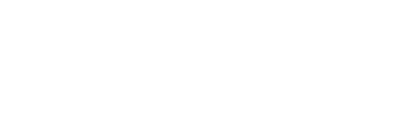

In [3]:
qml.drawer.draw_mpl(c, style="sketch")()


In [2]:
x =[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

x.index((0,0))

0

In [114]:
data_string_arr = []
prev = None
temp = []
i = 0
data_ind = b
while i < len(b):
    j = i
    temp = []
    while j < len(data_ind):
        if data_ind[j][0] == data_ind[i][0]:
            temp.append(data_ind[j])
            j += 1
        else:
            break
    data_string_arr.append(temp)
    i = j
    
data_string_arr

[[(0, 0), (0, 1), (0, 2)], [(1, 0), (1, 1), (1, 2)], [(2, 0), (2, 1), (2, 2)]]

In [123]:
def get_data_string_arr(data_ind):
    data_string_arr = []
    i = 0
    while i < len(b):
        j = i
        temp = []
        while j < len(data_ind):
            if data_ind[j][0] == data_ind[i][0]:
                temp.append(data_ind[j])
                j += 1
            else:
                break
        data_string_arr.append(temp)
        i = j
        
    return data_string_arr

def arrange_lattice_info_correct_order(top, bottom, left, right, middle, distance):
    final = top
    i = 1
    addRight = True
    j = 0
    while j < len(middle):
        if i == distance and addRight and right:
            final.append(right.pop(0))
            addRight = False
            i = 1
        elif i == 1 and not addRight and left:
            final.append(left.pop(0))
            addRight = True
            
        else:    
            final.append(middle[j])
            j += 1
            i += 1
        
    for b in bottom:
        final.append(b)
        
    return final

In [135]:
import networkx as nx

def lattice():
    top = []
    right = []
    bottom = []
    left = []
    middle = []
    
    data_string_arr = []
    i = 0
    
    d = 5
    data_string = nx.Graph()
    syndrome_string = nx.Graph()
    
    for i in range(0, d):
        for j in range(0, d):
            data_string.add_node((i, j))
    data_ind = list(data_string.nodes)
    data_string_arr = get_data_string_arr(data_ind)
    
    for i in range(len(data_string_arr)):
        for j in range(len(data_string_arr[0])):
            if j == len(data_string_arr[0]) - 1:
                if i < len(data_string_arr) - 1 and i % 2 == 0:
                    right.append([data_string_arr[i][j][0] + 0.5, data_string_arr[i][j][1] + 0.5])
                    
            if i == 0:
                if j < len(data_string_arr[0]) - 1 and j % 2 == 0:
                    top.append([data_string_arr[i][j][0]- 0.5, data_string_arr[i][j][1] + 0.5])
                                
            if i == len(data_string_arr) - 1:
                if j < len(data_string_arr[0]) - 1 and j % 2 != 0:
                    bottom.append([data_string_arr[i][j][0] + 0.5, data_string_arr[i][j][1] + 0.5])
            if j == 0:
                if i < len(data_string_arr) - 1  and i % 2 != 0:
                    left.append([data_string_arr[i][j][0] + 0.5, data_string_arr[i][j][1] - 0.5])
                    
    for i in range(1, len(data_string_arr)):
        for j in range(len(data_string_arr[0]) - 1):
            middle.append([data_string_arr[i][j][0] - 0.5, data_string_arr[i][j + 1][1] - 0.5])

    lattice_arr = arrange_lattice_info_correct_order(top, bottom, left, right, middle, d)
    
    for l in lattice_arr:
        syndrome_string.add_node(tuple(l))
        
    return [list(syndrome_string), data_ind]

lattice()[0]

[(-0.5, 0.5),
 (-0.5, 2.5),
 (0.5, 0.5),
 (0.5, 1.5),
 (0.5, 2.5),
 (0.5, 3.5),
 (0.5, 4.5),
 (1.5, -0.5),
 (1.5, 0.5),
 (1.5, 1.5),
 (1.5, 2.5),
 (1.5, 3.5),
 (2.5, 4.5),
 (3.5, -0.5),
 (2.5, 0.5),
 (2.5, 1.5),
 (2.5, 2.5),
 (2.5, 3.5),
 (3.5, 0.5),
 (3.5, 1.5),
 (3.5, 2.5),
 (3.5, 3.5),
 (4.5, 1.5),
 (4.5, 3.5)]

In [136]:
code.lattice()[0]

[(-0.5, 0.5),
 (-0.5, 2.5),
 (0.5, 0.5),
 (0.5, 1.5),
 (0.5, 2.5),
 (0.5, 3.5),
 (0.5, 4.5),
 (1.5, -0.5),
 (1.5, 0.5),
 (1.5, 1.5),
 (1.5, 2.5),
 (1.5, 3.5),
 (2.5, 0.5),
 (2.5, 1.5),
 (2.5, 2.5),
 (2.5, 3.5),
 (2.5, 4.5),
 (3.5, -0.5),
 (3.5, 0.5),
 (3.5, 1.5),
 (3.5, 2.5),
 (3.5, 3.5),
 (4.5, 1.5),
 (4.5, 3.5)]

In [7]:
import numpy as np
z = np.array([[1,0],[0,-1]]
)

i = np.array([[1,0],[0,1]])
cnot = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])

np.matmul(np.kron(z,i), np.matmul(cnot, np.kron(z,i)))

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])